In [690]:
#import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math
from sklearn.metrics import mean_squared_error

#read the data
df = pd.read_csv("societe_generale_training.csv")
df_test = pd.read_csv("societe_generale_test.csv")


#check the dtypes
df.dtypes

serial_number      int64
time_stamp        object
1 year           float64
2 year           float64
3 year           float64
4 year           float64
5 year           float64
6 year           float64
7 year           float64
8 year           float64
9 year           float64
10 year          float64
15 year          float64
20 year          float64
25 year          float64
30 year          float64
dtype: object

In [691]:
#changing timestamp object to datetime in training data
df['time_stamp'] = pd.to_datetime(df.time_stamp , format = '%Y/%m/%d')
data = df.drop(['time_stamp'], axis=1)
data.index = df.time_stamp


In [692]:
#sort the index
data= data.sort_index(ascending=True)


In [693]:
#changing timestamp object to datetime in test dataset
df_test['time_stamp'] = pd.to_datetime(df_test.time_stamp , format = '%Y/%m/%d')
data_test = df_test.drop(['time_stamp'], axis=1)
data_test.index = df_test.time_stamp

In [694]:
#Sorting test data index
data_test= data_test.sort_index(ascending=True)


In [695]:
type(data)

pandas.core.frame.DataFrame

In [696]:
df.dtypes


serial_number             int64
time_stamp       datetime64[ns]
1 year                  float64
2 year                  float64
3 year                  float64
4 year                  float64
5 year                  float64
6 year                  float64
7 year                  float64
8 year                  float64
9 year                  float64
10 year                 float64
15 year                 float64
20 year                 float64
25 year                 float64
30 year                 float64
dtype: object

In [697]:
#checking missing value
df.isnull().sum()


serial_number       0
time_stamp          0
1 year            648
2 year            361
3 year             76
4 year              0
5 year              0
6 year              0
7 year              0
8 year              0
9 year              0
10 year          3361
15 year          4702
20 year          3474
25 year          7795
30 year          6677
dtype: int64

In [698]:
#checking missing value in test data set
df_test.isnull().sum()


serial_number    0
time_stamp       0
1 year           0
2 year           0
3 year           0
4 year           0
6 year           0
7 year           0
8 year           0
9 year           0
10 year          0
15 year          0
20 year          0
25 year          0
30 year          0
dtype: int64

In [699]:
cols = data.columns
cols

Index(['serial_number', '1 year', '2 year', '3 year', '4 year', '5 year',
       '6 year', '7 year', '8 year', '9 year', '10 year', '15 year', '20 year',
       '25 year', '30 year'],
      dtype='object')

In [701]:
#interpolating missing values in train dataset
data=data.interpolate(method="linear")
data.shape


(8430, 15)

In [703]:
#dropping the columns that are not required, dropping columns after 10 year as they have a large number of missing values.
data = data.drop([ 'serial_number','10 year','15 year','20 year','25 year','30 year'], axis=1)


In [705]:
data_test = data_test.drop([ 'serial_number','10 year','15 year','20 year','25 year','30 year'], axis=1)


In [706]:
cols = data.columns
len(data)
cols

Index(['1 year', '2 year', '3 year', '4 year', '5 year', '6 year', '7 year',
       '8 year', '9 year'],
      dtype='object')

In [707]:
cols_test = data_test.columns

cols_test

Index(['1 year', '2 year', '3 year', '4 year', '6 year', '7 year', '8 year',
       '9 year'],
      dtype='object')

In [708]:
#checking stationarity in test dataset eigenvalue should be less than 1
from statsmodels.tsa.vector_ar.vecm import coint_johansen

coint_johansen(data,-1,1).eig

array([ 0.01428149,  0.01081521,  0.00970097,  0.00690534,  0.00591747,
        0.00404489,  0.00329828,  0.00093787,  0.00069099])

In [709]:
#checking stationarity in test dataset eigenvalue should be less than 1
coint_johansen(data_test,-1,1).eig

array([ 0.04333784,  0.02899753,  0.02373697,  0.02191697,  0.01283357,
        0.0061133 ,  0.00139552,  0.00106314])

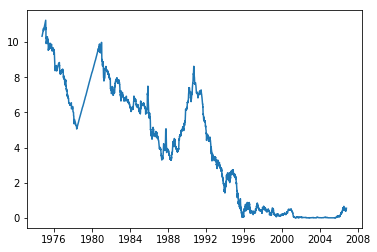

In [710]:
import matplotlib.pyplot as plt
plt.plot('1 year', data = data)
plt.show()

In [711]:
#creating the train and validation set
train = data[:]
test = data_test[:]

#fit the model
from statsmodels.tsa.vector_ar.var_model import VAR

model = VAR(endog=train)
model_fit = model.fit()

# make prediction on validation
prediction = model_fit.forecast(model_fit.y, steps=len(test))

/home/akhileshy/.conda/envs/fastai/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [712]:
#converting predictions to dataframe
pred = pd.DataFrame(index=range(0,len(prediction)),columns=[cols])
for j in range(0,9):
    for i in range(0, len(prediction)):
        pred.iloc[i][j] = prediction[i][j]

#check rmse
for i in cols_test:
    print('rmse value for', i, 'is : ', math.sqrt(mean_squared_error(pred[i], test[i])))

rmse value for 1 year is :  0.16678792961457206
rmse value for 2 year is :  0.15725856446388412
rmse value for 3 year is :  0.22574002571671367
rmse value for 4 year is :  0.36707375475416176
rmse value for 6 year is :  0.6409181992430047
rmse value for 7 year is :  0.7423394660331671
rmse value for 8 year is :  0.8277181654432505
rmse value for 9 year is :  0.8666323207872723


In [713]:
pred

,1 year,2 year,3 year,4 year,5 year,6 year,7 year,8 year,9 year
0,0.553836,0.743988,0.933156,1.10581,1.27471,1.39809,1.51191,1.62295,1.7111
1,0.552675,0.741981,0.931315,1.10461,1.27343,1.39719,1.51182,1.62289,1.71118
2,0.551516,0.739978,0.929478,1.1034,1.27214,1.39629,1.51172,1.62284,1.71127
3,0.55036,0.737979,0.927644,1.10219,1.27086,1.39539,1.51161,1.62278,1.71135
4,0.549206,0.735986,0.925814,1.10097,1.26957,1.39449,1.51149,1.62272,1.71142
5,0.548055,0.733998,0.923987,1.09974,1.26829,1.3936,1.51137,1.62265,1.71148
6,0.546907,0.732014,0.922165,1.09851,1.267,1.3927,1.51123,1.62259,1.71154
7,0.545761,0.730036,0.920346,1.09728,1.26572,1.39181,1.51109,1.62252,1.7116
8,0.544617,0.728064,0.91853,1.09603,1.26444,1.39093,1.51094,1.62245,1.71165
9,0.543476,0.726097,0.916719,1.09478,1.26315,1.39004,1.51079,1.62239,1.7117


In [714]:
final=pred.iloc[:,4].values
final[2999]

0.51769800439862868

In [715]:
for i in reversed(final):
      print(i)

0.517698004399
0.517833725946
0.517969479338
0.518105264583
0.518241081688
0.51837693066
0.518512811507
0.518648724237
0.518784668857
0.518920645375
0.519056653799
0.519192694135
0.519328766393
0.519464870579
0.519601006701
0.519737174766
0.519873374783
0.520009606758
0.5201458707
0.520282166616
0.520418494514
0.520554854401
0.520691246285
0.520827670174
0.520964126075
0.521100613996
0.521237133944
0.521373685928
0.521510269955
0.521646886032
0.521783534167
0.521920214369
0.522056926643
0.522193670999
0.522330447444
0.522467255986
0.522604096631
0.522740969389
0.522877874266
0.52301481127
0.52315178041
0.523288781692
0.523425815124
0.523562880714
0.52369997847
0.5238371084
0.52397427051
0.524111464809
0.524248691305
0.524385950006
0.524523240918
0.52466056405
0.524797919409
0.524935307003
0.52507272684
0.525210178928
0.525347663274
0.525485179887
0.525622728773
0.52576030994
0.525897923397
0.526035569151
0.526173247209
0.52631095758
0.526448700272
0.526586475291
0.526724282646
0.526862

0.91032073099
0.910569948789
0.910819258474
0.911068659715
0.911318152182
0.91156773554
0.911817409452
0.912067173575
0.912317027568
0.912566971082
0.912817003768
0.913067125272
0.913317335237
0.913567633304
0.91381801911
0.914068492288
0.914319052471
0.914569699285
0.914820432355
0.915071251302
0.915322155745
0.915573145298
0.915824219574
0.916075378181
0.916326620724
0.916577946807
0.916829356029
0.917080847985
0.917332422268
0.917584078469
0.917835816174
0.918087634967
0.918339534428
0.918591514134
0.91884357366
0.919095712576
0.919347930451
0.919600226849
0.919852601333
0.92010505346
0.920357582786
0.920610188864
0.920862871242
0.921115629468
0.921368463085
0.921621371631
0.921874354645
0.922127411661
0.92238054221
0.922633745818
0.922887022012
0.923140370314
0.923393790241
0.923647281311
0.923900843035
0.924154474924
0.924408176486
0.924661947223
0.924915786636
0.925169694225
0.925423669485
0.925677711906
0.92593182098
0.926185996193
0.926440237027
0.926694542965
0.926948913484
0.